# Data Collection and  Data Inspection:
Useing pandas' `read_csv()` function to load the dataset into a DataFrame.


Useing DataFrame's `head()`, `info()`, and `describe()` methods to get a quick overview of the data.

In [73]:
# Import necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Telco-Customer-Churn.csv')

# Display the first few rows of the DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
# Get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Observation

The df.info() method provides a quick summary of the DataFrame, including the number of non-null entries in each column, the data type of each column, and the memory usage of our DataFrame. Here's what each part of the output means:

* RangeIndex: The DataFrame has 7043 entries, meaning there are 7043 rows in the dataset. The range from 0 to 7042 represents the indices of these rows.
* Data columns (total 21 columns): There are 21 columns in the DataFrame.
* Non-Null Count: This shows the number of non-null (i.e., not missing) values in each column. If all entries in a column are non-null, then the number here should match the total number of entries (7043 in this case). If these numbers don't match, it means there are missing values in that column.
* Dtype: This represents the data type of each column. "int64" is a 64-bit integer, "float64" is a 64-bit floating point number (i.e., a number that can have a decimal), and "object" typically means the column contains text or mixed numeric and non-numeric values.
* Memory usage: This is the amount of memory used by the DataFrame.
From this output, we can see that:

All columns have no missing values, as the non-null count matches the total number of entries for all columns.
The 'TotalCharges' column is currently recognized as an object, which suggests it contains non-numeric values (this is likely due to the spaces I mentioned earlier). This column will need to be converted to a numeric type for further analysis or model building.
Most of the data columns are of the object data type, which are likely to be categorical variables. These may need to be encoded to numerical values for some machine learning models.
There are two integer columns ('SeniorCitizen' and 'tenure') and one float column ('MonthlyCharges').
'customerID' is an object, which fits with our understanding that it's a unique identifier for each customer.

# Data Cleaning and Pre-processing:
* Handle Missing Values: Use DataFrame's `isnull().sum()` to check for missing values, and `fillna()` or `dropna()` to handle them.
* Data Type Conversion: Use `astype()` method to convert data types.
* Outlier Detection: Use techniques like Z-score or IQR to detect outliers.
* Duplicate Values: Use DataFrame's `duplicated()` and `drop_duplicates()` methods to handle duplicate rows.

In [75]:
# Get statistical summary for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## 1. Handle Missing Values:

In [76]:
# Check for missing or null values in the dataset
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Observation and Action

**It seems that there are no null values but there is something that I am going to show**

### Dropping unnecessary column 'customerID':

The 'customerID' column is likely a unique identifier for each customer. While this is useful for looking up specific customers and for joining data from different sources, it doesn't provide any useful information for modeling. This is because these identifiers are usually assigned arbitrarily and don't contain any meaningful pattern that could be related to customer churn.

In fact, including 'customerID' in th emodel could potentially be harmful. Machine learning algorithms try to find patterns in the data, and if we include a column of arbitrary numbers, the algorithm might end up finding spurious patterns in these numbers that don't actually relate to the target variable. This could lead to overfitting, where the model performs well on the training data but poorly on new, unseen data.

Therefore, it's common practice to remove columns like 'customerID' before training a model.

### Handling 'TotalCharges' column:

The 'TotalCharges' column seems to have some problematic values. Specifically, some entries are strings that consist only of a space. These are essentially missing values, but because they're represented as strings rather than NaNs, they can cause issues if we try to perform mathematical operations on this column or use it in a machine learning model.

By replacing these values with null values, we're making the missing data explicit and ensuring that it's handled correctly by any functions that i use in the future. Then, by filling in these null values with the mean of the 'TotalCharges' column, we're making a best guess about what these missing values might have been. This is a common way to handle missing data, and it's suitable when the number of missing values is small and when the missing data is believed to be missing at random.

However, it's worth noting that there are many ways to handle missing data, and the best method depends on the specifics of the data and the problem at hand. For example, if the missing data is not missing at random, then filling in missing values with the mean could introduce bias. In such cases, other methods like predictive imputation might be more appropriate.

Dropping unnecessary column `customerID`, which has no switch significance in the data and also `Totalcharges` has some strings that includes only a space. So I am going to handle it by replacing it first with null values and then filling the null values with the mean of the column `totalcharges`.

In [77]:
df.drop('customerID', axis = 1, inplace=True)

In [78]:
df[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [79]:
for i in range(len(df[['TotalCharges']])):
    #print(df['TotalCharges'][i])
    if df['TotalCharges'][i] == ' ':
        df['TotalCharges'][i] = np.nan

In [80]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [81]:
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric)

In [82]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**one of the intelligent way to fill the null values in a column would be to fill by the mean of it 
here filling null values by mean of the column of `TotalCharges`**

In [83]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

## 2. Duplicate Values:

In [84]:
# Check for duplicates
print(df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()

# Reset index after dropping rows
df = df.reset_index(drop=True)

22


# Exploratory Data Analysis (EDA):
* Univariate Analysis: Using pandas' `mean()`, `median()`, `mode()`, `std()` for numerical variables, and `value_counts()` for categorical variables.
* Bivariate Analysis: Using seaborn's `scatterplot()` for numerical variables and `countplot()` for categorical variables.
* Multivariate Analysis: Using seaborn's `pairplot()` or `heatmap()` for correlation matrix.
* Visualization: Using `matplotlib` and `seaborn` for creating charts and graphs.

## 1. Univariate Analysis:

In [85]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

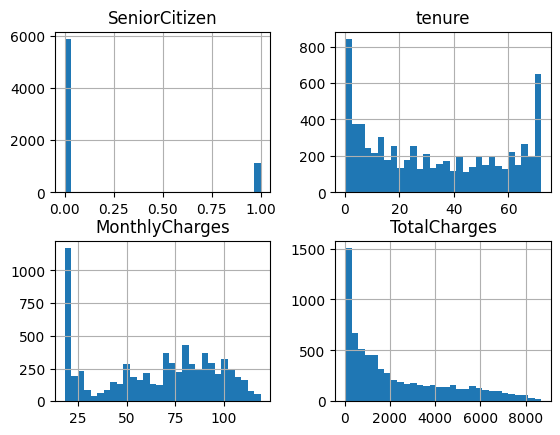

In [86]:
# For numerical variables, we can plot a histogram to understand its distribution
df[['SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges']].hist(bins=30)
plt.show()

In [87]:
cat_cols = ['gender', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

# For categorical variables, we can use value_counts() to understand the distribution
for cols in cat_cols:
    print(df[cols].value_counts())
    print("-------------------------------------------------")

Male      3541
Female    3480
Name: gender, dtype: int64
-------------------------------------------------
No     3619
Yes    3402
Name: Partner, dtype: int64
-------------------------------------------------
No     4911
Yes    2110
Name: Dependents, dtype: int64
-------------------------------------------------
Yes    6339
No      682
Name: PhoneService, dtype: int64
-------------------------------------------------
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-------------------------------------------------
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
-------------------------------------------------
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
-------------------------------------------------
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, d

## Observation

### The provided distribution of categorical features offers a great understanding of the dataset. we can draw some insights from this data:

* Gender: The gender distribution is almost evenly split, with a slight majority of male customers.
* Partner: There are slightly more customers without a partner than with a partner.
* Dependents: The majority of customers do not have dependents.
* PhoneService: Most customers have phone service.
* MultipleLines: The distribution is almost even between those with multiple lines and those without, but there is also a significant number of customers without phone service.
* InternetService: The largest group of customers has fiber optic internet service, followed by DSL, and a significant number of customers do not have internet service.
* OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: For each of these services, the largest group of customers do not have the service, followed by those who do, and a significant number of customers do not have internet service.
* StreamingTV, StreamingMovies: The distribution is almost even between those who have these services and those who do not, and a significant number of customers do not have internet service.
* Contract: The majority of customers have a month-to-month contract, followed by two-year contracts, and one-year contracts.
* PaperlessBilling: The majority of customers have paperless billing.
* PaymentMethod: Electronic check is the most common payment method, followed closely by the other methods.
* Churn: The majority of customers have not churned.

This kind of analysis is crucial in understanding the characteristics of the customer base and can guide further analysis and the development of predictive models. For example, knowing that the majority of customers have a month-to-month contract could be useful in a churn prediction model, as customers with shorter-term contracts may be more likely to churn. Similarly, the fact that electronic check is the most common payment method may suggest that customers prefer this method, which could be an important feature in a model predicting customer churn.

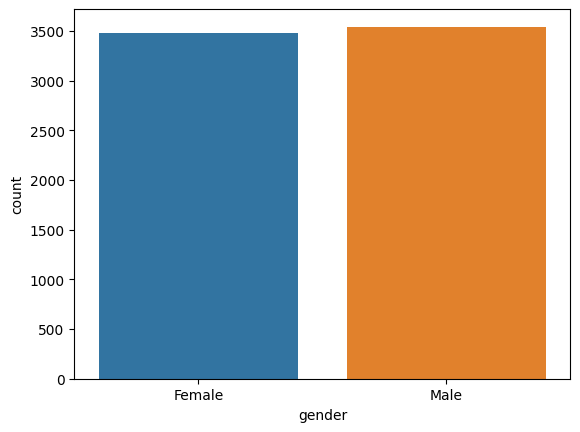

--------------------------------------------------------------------------


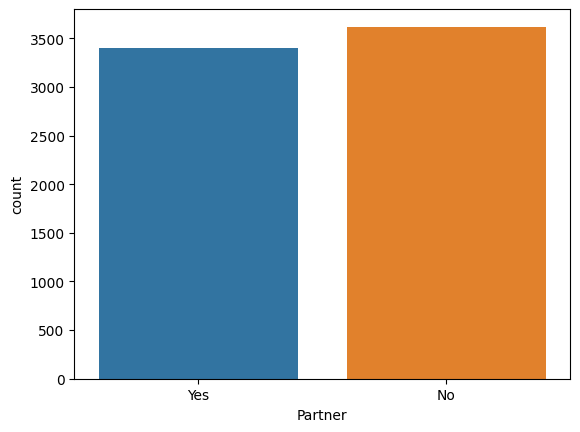

--------------------------------------------------------------------------


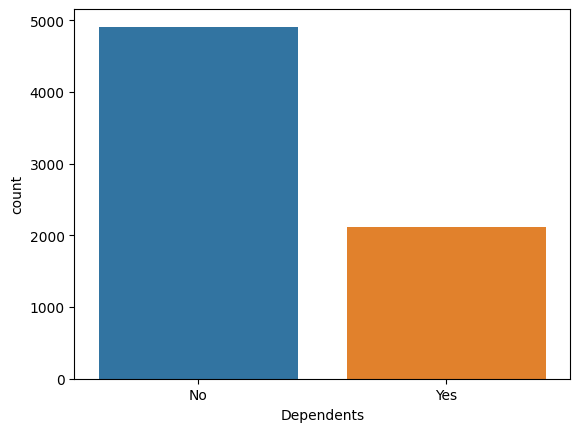

--------------------------------------------------------------------------


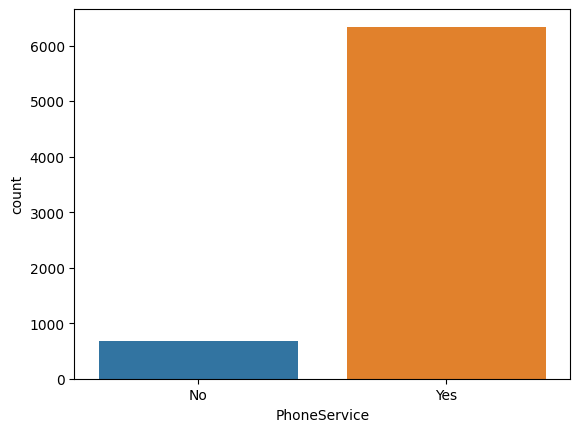

--------------------------------------------------------------------------


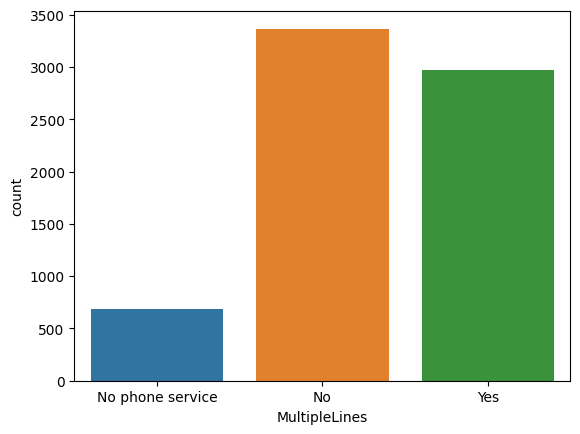

--------------------------------------------------------------------------


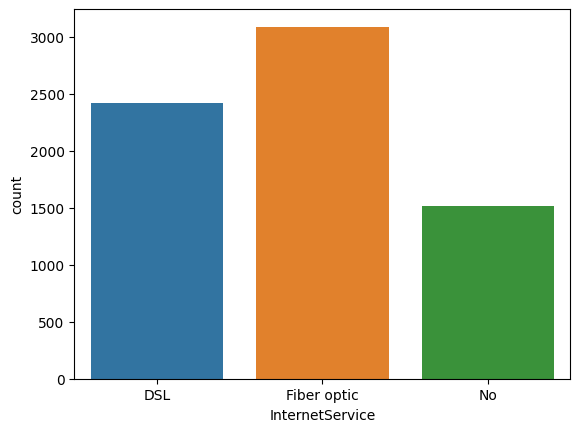

--------------------------------------------------------------------------


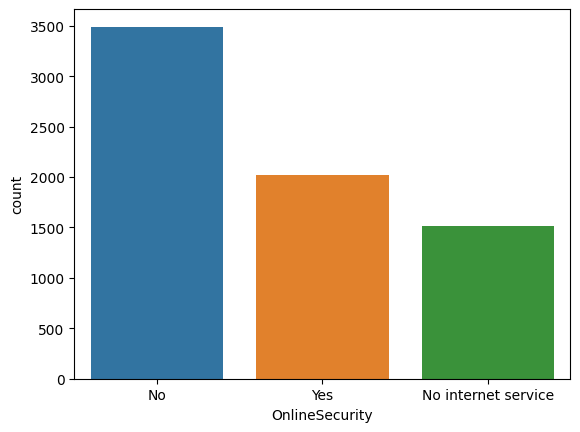

--------------------------------------------------------------------------


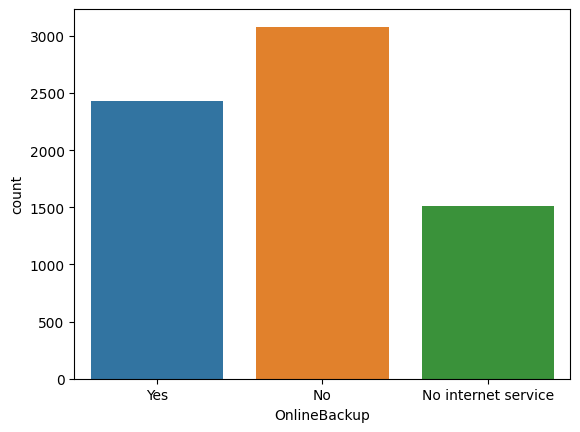

--------------------------------------------------------------------------


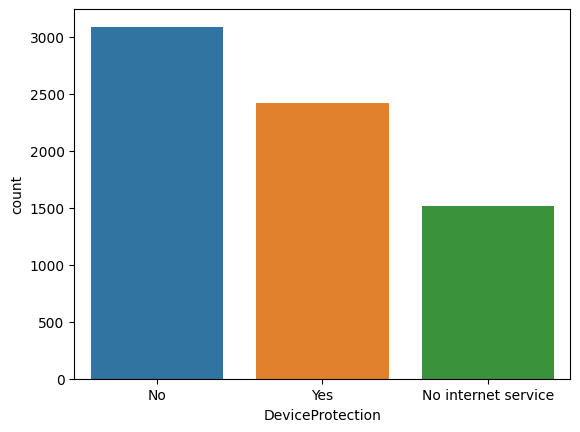

--------------------------------------------------------------------------


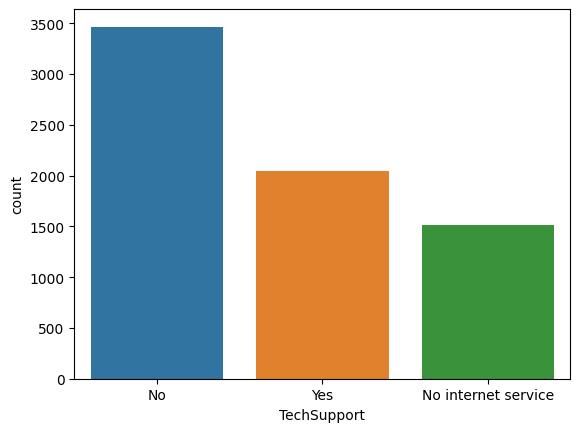

--------------------------------------------------------------------------


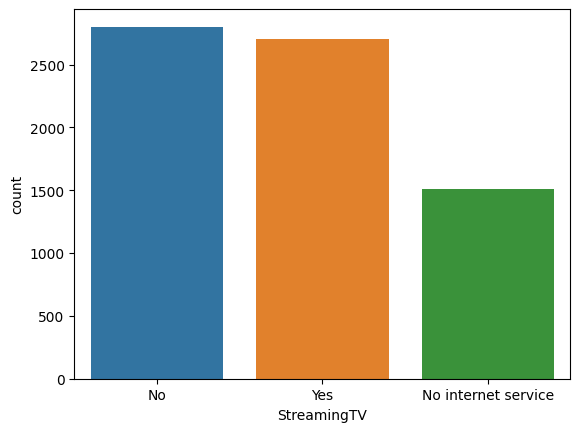

--------------------------------------------------------------------------


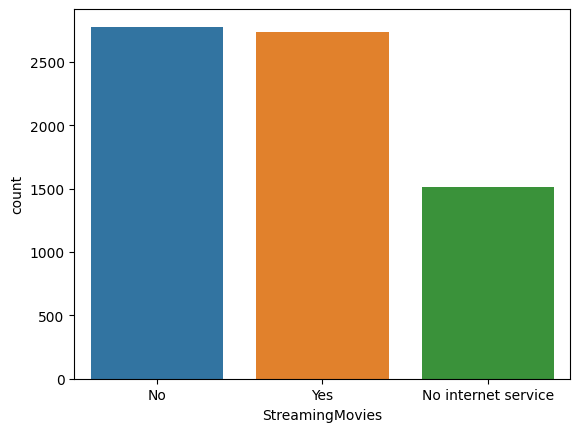

--------------------------------------------------------------------------


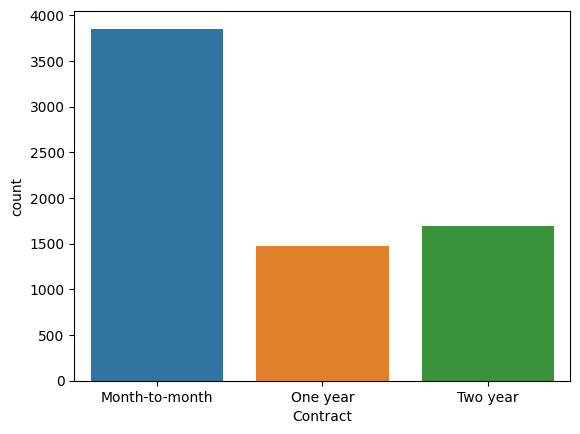

--------------------------------------------------------------------------


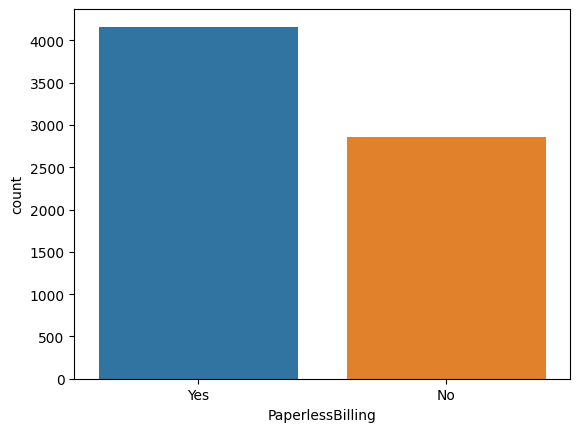

--------------------------------------------------------------------------


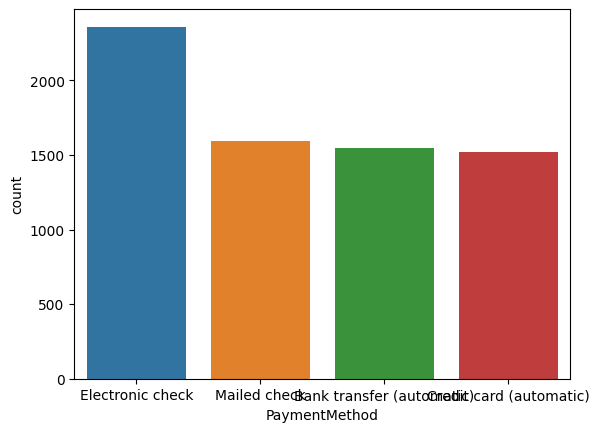

--------------------------------------------------------------------------


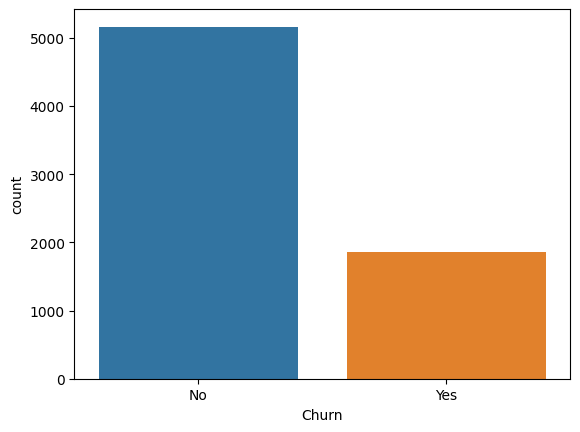

--------------------------------------------------------------------------


In [88]:
# For categorical variables, we can use sns.countplot() to understand the distribution
for cols in cat_cols:
    sns.countplot(x = cols, data = df)
    plt.show()
    print("--------------------------------------------------------------------------")

# 2. Bivariate Analysis:

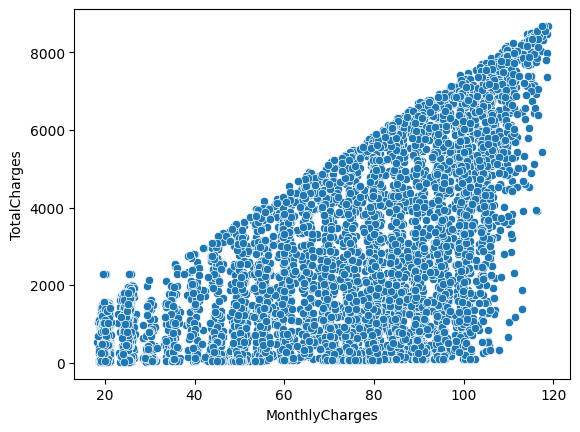

In [89]:
# we can use seaborn's scatterplot for numerical variables
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.show()

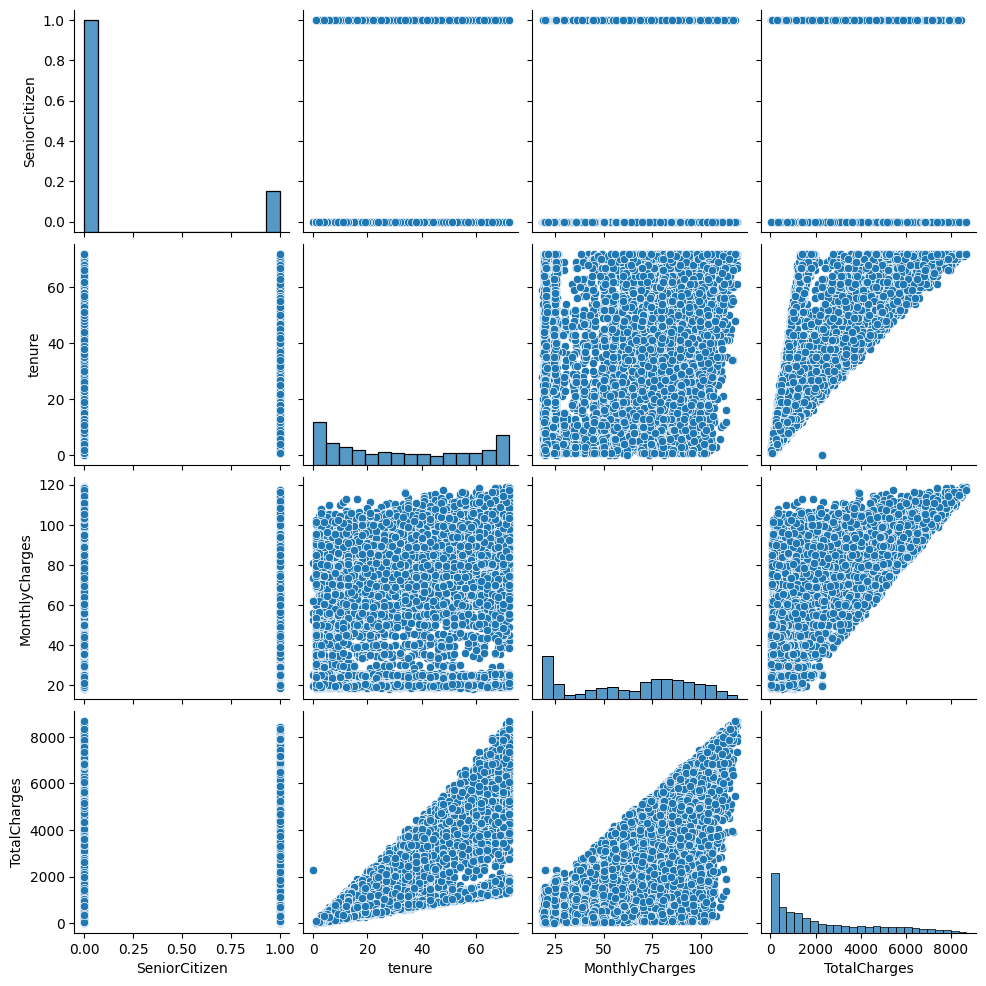

In [90]:
sns.pairplot(df)
plt.show()

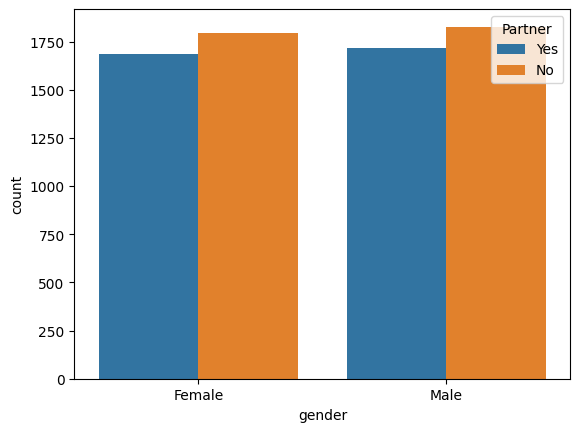

In [91]:
# For categorical variables, we can use seaborn's countplot
sns.countplot(x='gender', hue='Partner', data=df)
plt.show()

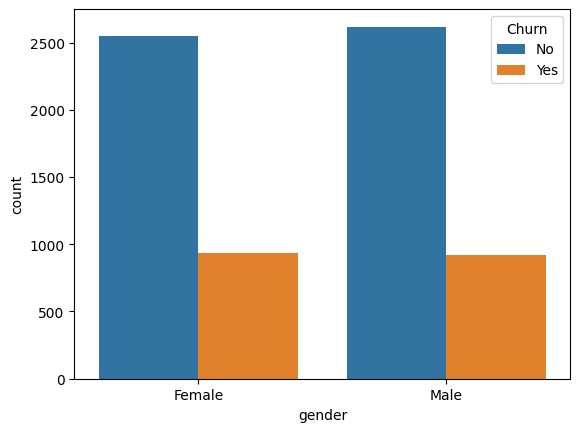

In [92]:
# trying to find out if the churn is any how related to gender.
sns.countplot(x='gender', hue='Churn', data=df)
plt.show()

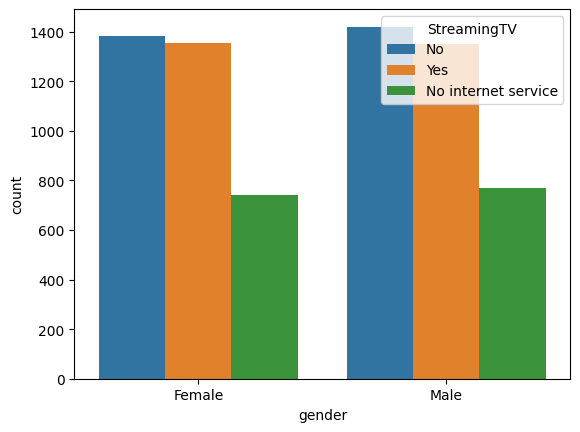

In [93]:
# For categorical variables, we can use seaborn's countplot
sns.countplot(x='gender', hue='StreamingTV', data=df)
plt.show()

#### To perform bivariate analysis between 'Churn' and other variables, we can visualize the relationships using a variety of plots.

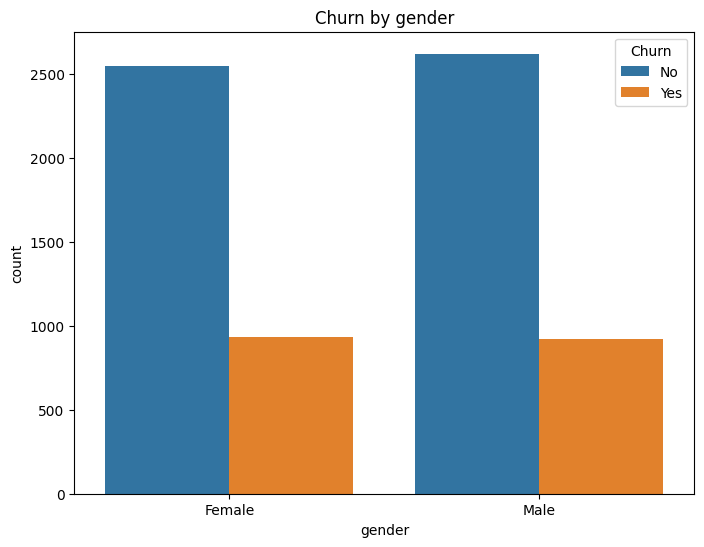

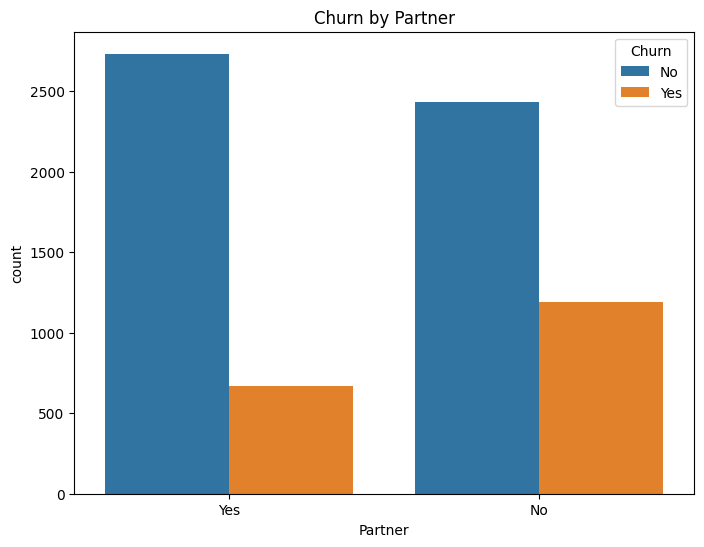

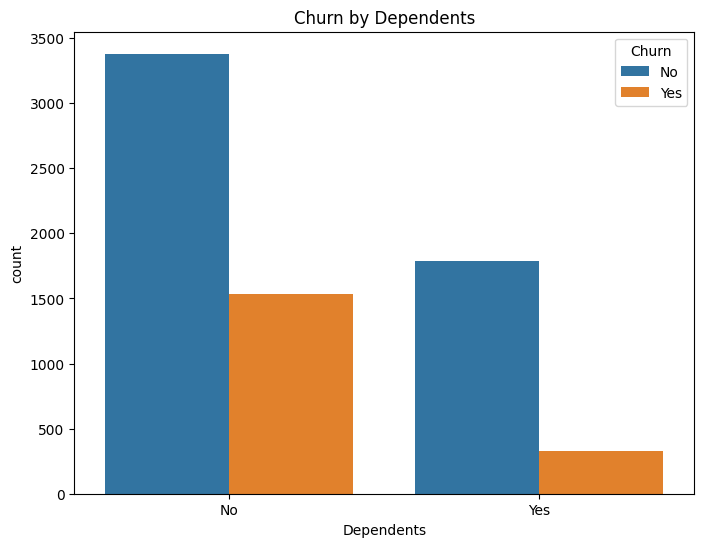

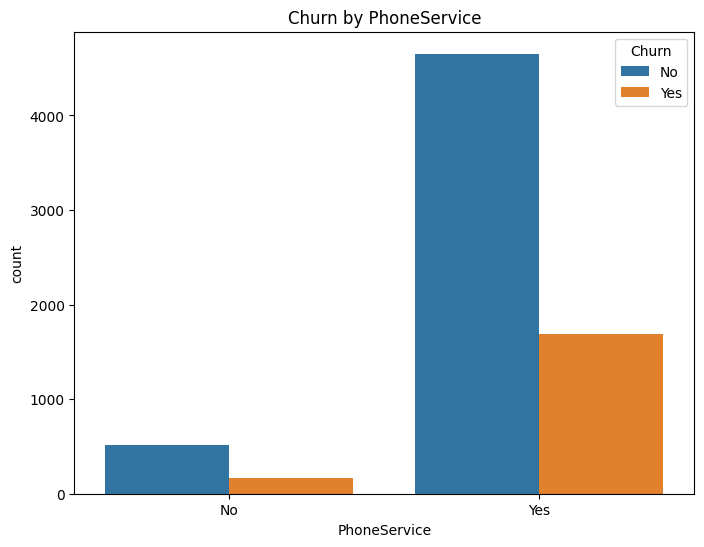

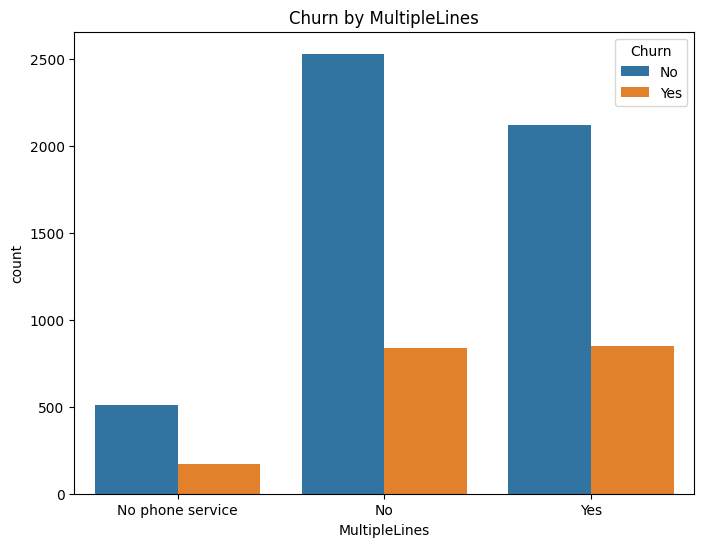

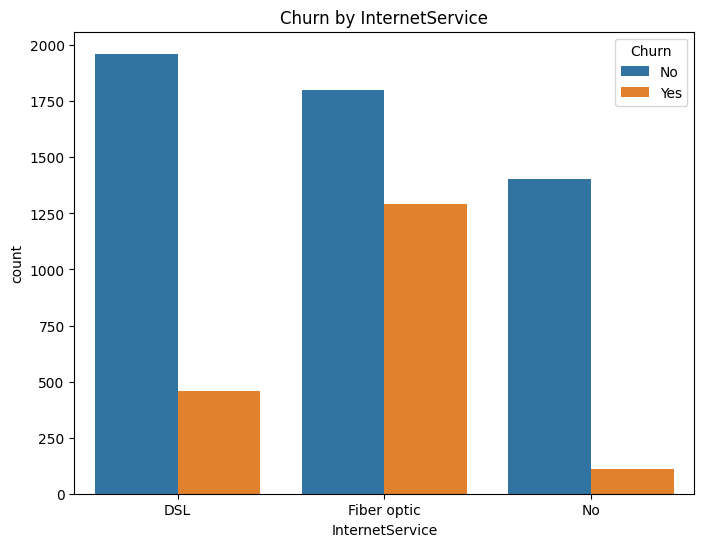

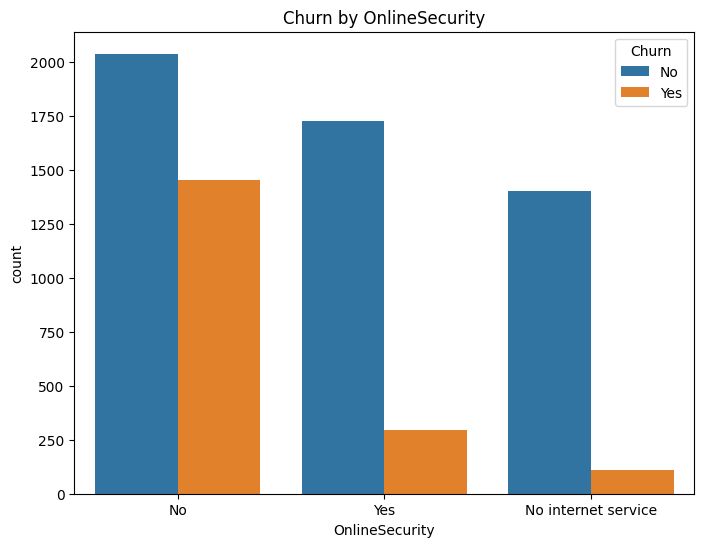

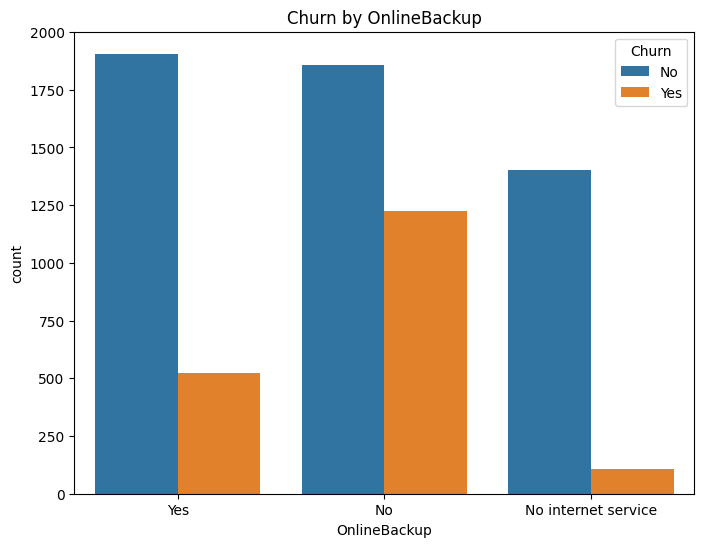

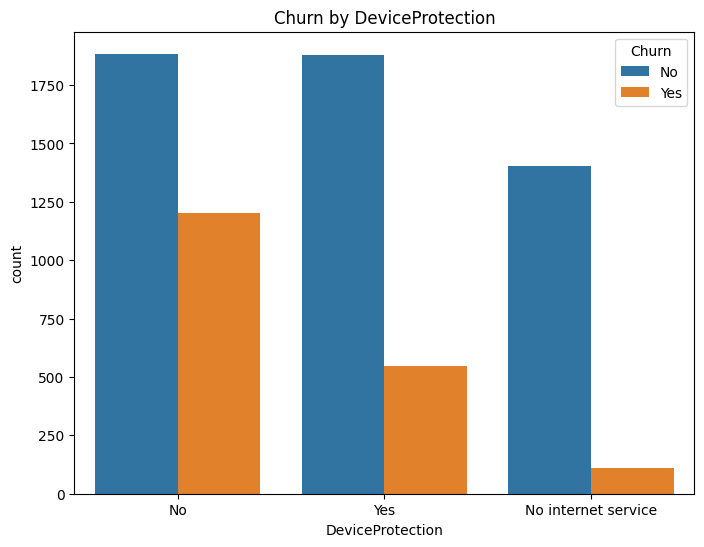

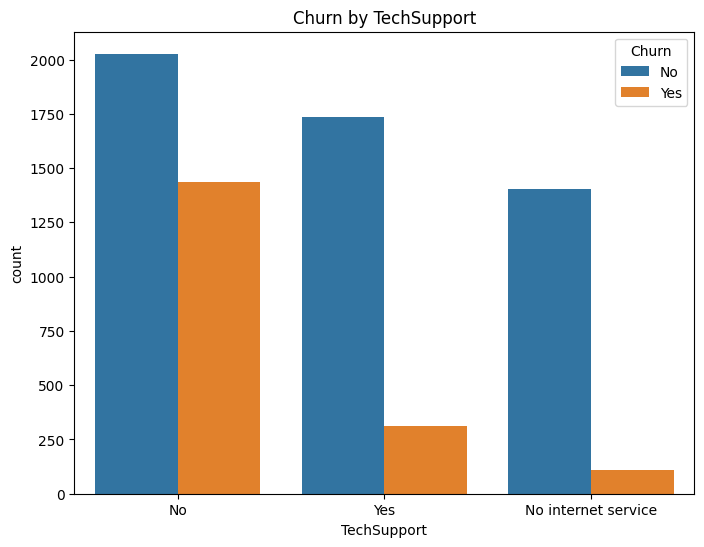

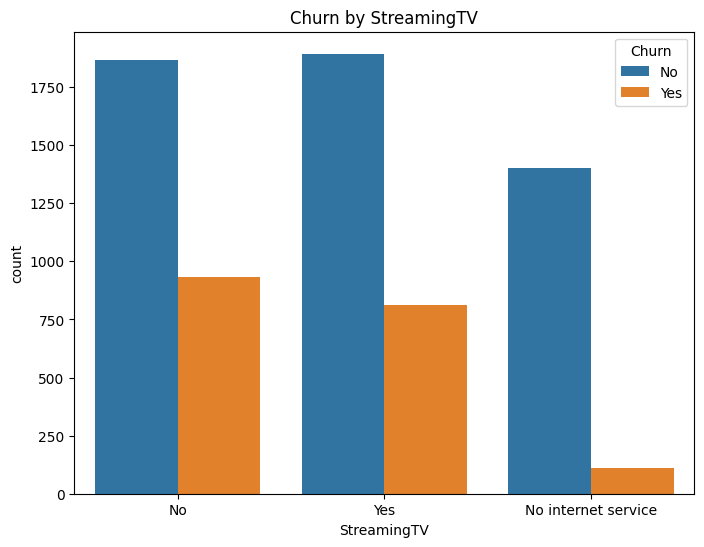

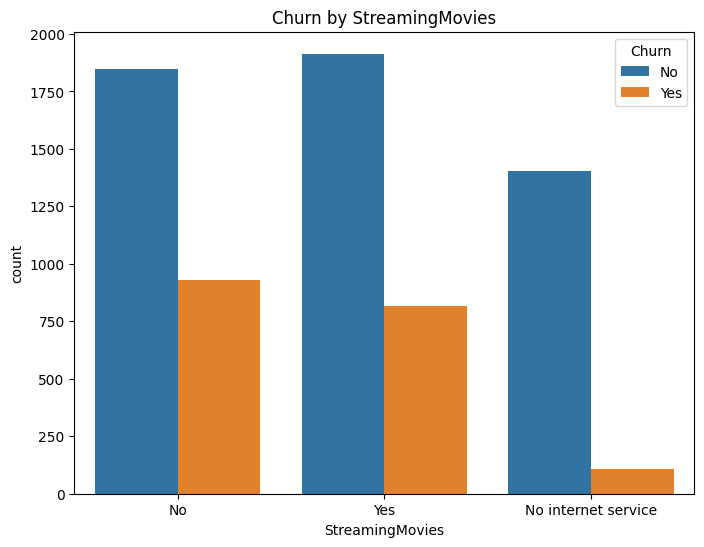

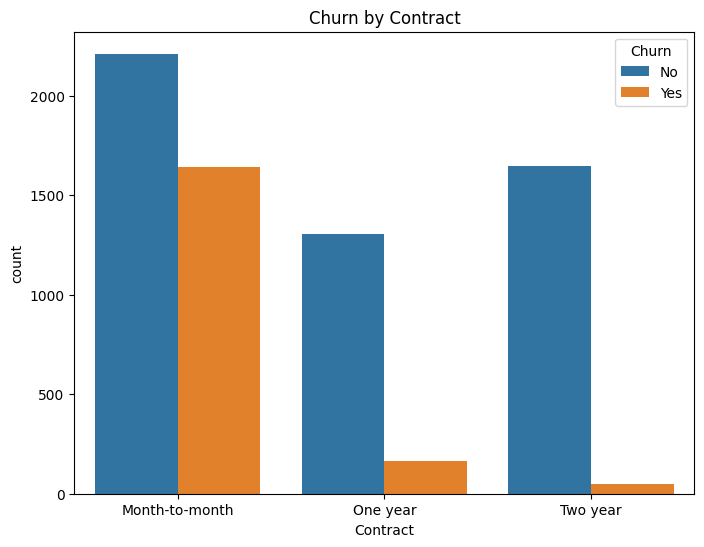

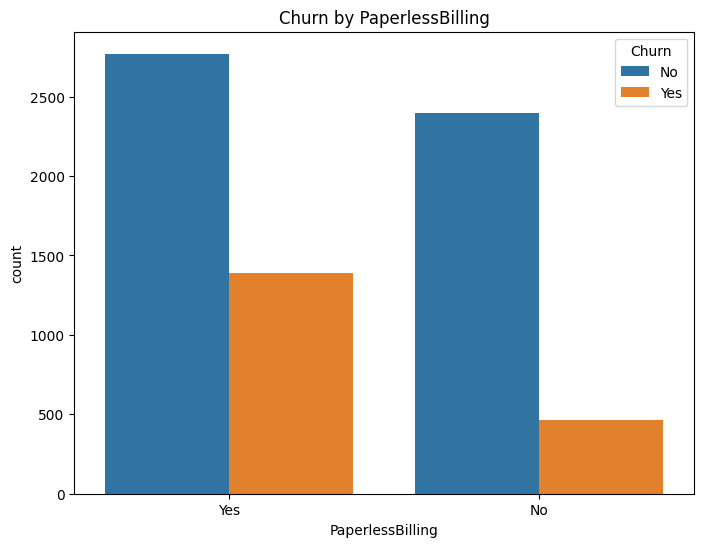

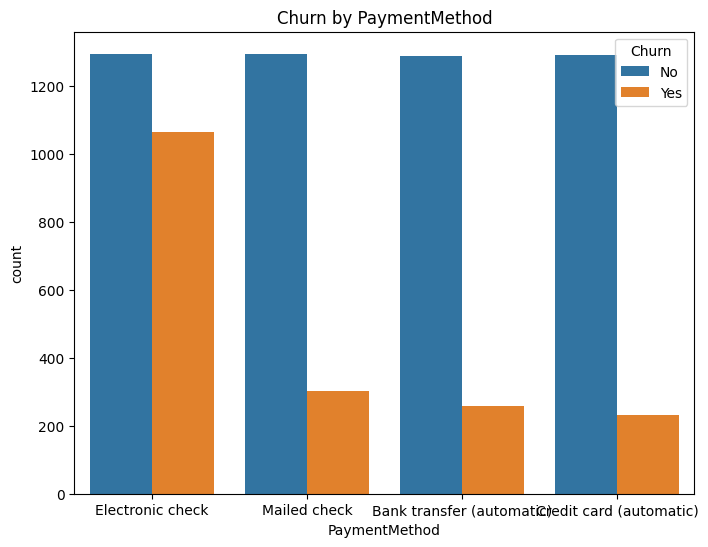

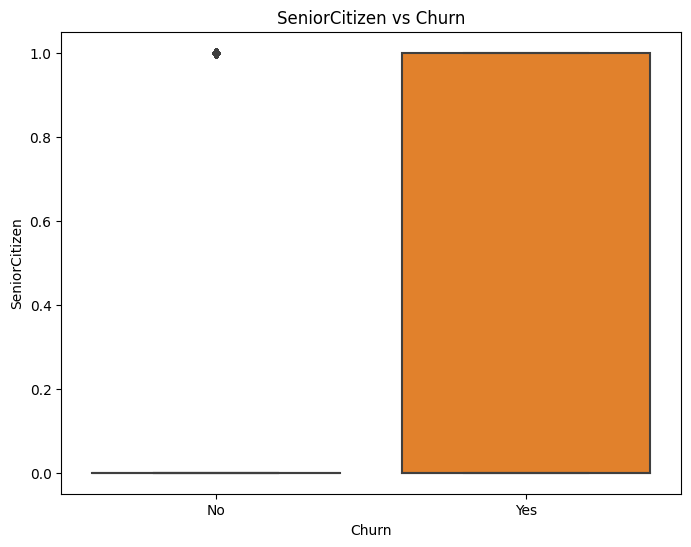

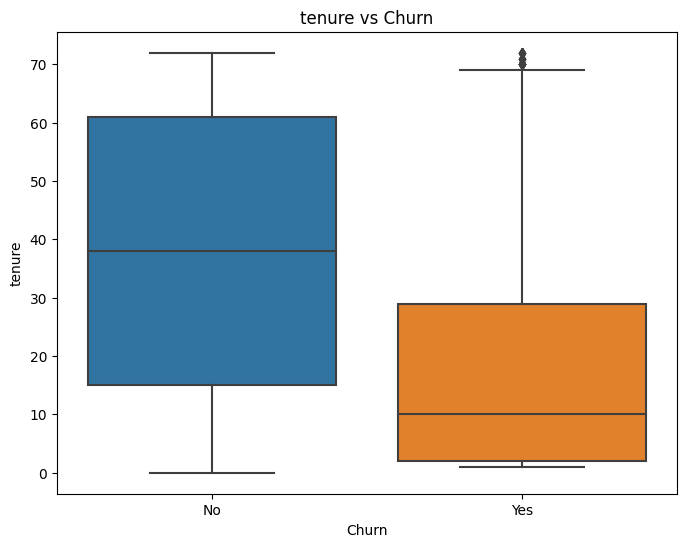

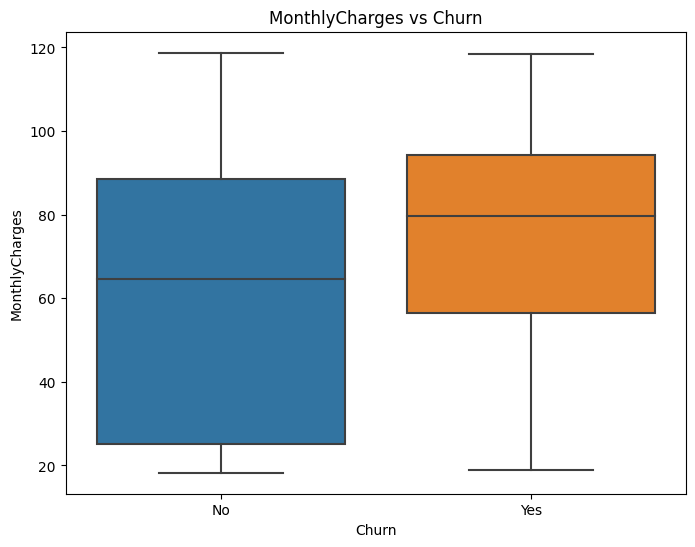

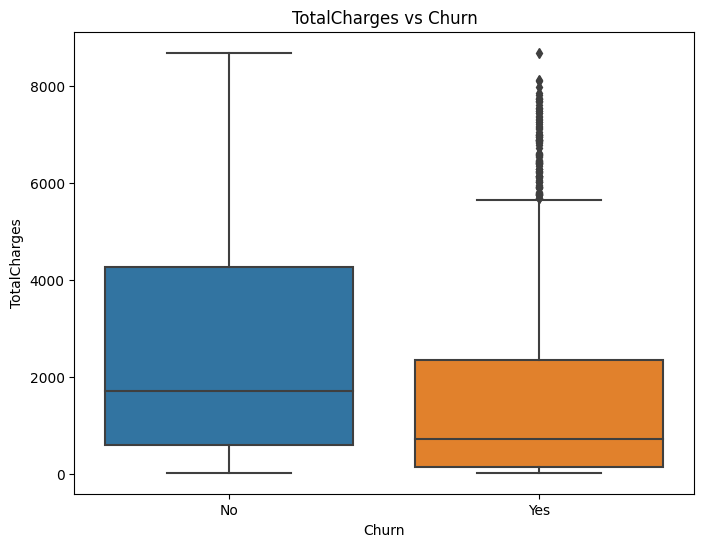

In [94]:
# List of categorical columns for which we want to perform bivariate analysis
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod']

# Bivariate analysis with 'Churn' for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='Churn', data=df)
    plt.title(f"Churn by {column}")
    plt.show()

# List of numerical columns for which we want to perform bivariate analysis
numerical_columns = ['SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges']

# Bivariate analysis with 'Churn' for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churn', y=column, data=df)
    plt.title(f"{column} vs Churn")
    plt.show()


## Observation form Bivariate Analysis

These insights are valuable for understanding customer churn. Here's how we might interpret them:

* **Fiber Optic Internet Service:** Customers with a fiber optic internet service are more likely to churn. This could indicate dissatisfaction with the service, perhaps due to price or quality. It's also possible that these customers have more alternatives available in their area and can easily switch to a different provider.
* **Lack of OnlineBackup and DeviceProtection:** Customers without online backup or device protection services are more likely to churn. These services might provide a sense of security and value, and customers without them may feel they're not getting a comprehensive service.
* **Lack of TechSupport:** Customers without tech support are more likely to churn. This could indicate that customers value having readily available support when they face issues.
* **Month-to-month Contract:** Customers with a month-to-month contract are more likely to churn. These customers have less commitment to the company and can easily leave if they're dissatisfied.
* **Paperless Billing:** Customers with paperless billing are more likely to churn. This could be coincidental, or it might indicate a segment of customers that are more comfortable with technology and therefore have more options available to them.
* **Electronic Check Payment Method:** Customers who pay by electronic check are more likely to churn. This might be related to the demographics of these customers or their payment preferences.
* **Senior Citizens:** Senior citizens are more likely to churn. This could be due to various reasons like price sensitivity, service usability, or changing needs.

**These insights can help the telecommunications company develop targeted strategies to reduce churn. For example, they could improve their fiber optic service, offer promotions for online backup and device protection, enhance their tech support, or provide incentives for customers to enter into longer contracts. They could also review their paperless billing process to ensure it's user-friendly and explore alternative payment options. Furthermore, they could develop specific strategies to meet the needs of senior citizens.**

Remember, these are just interpretations based on the provided analysis and might not reflect the actual reasons for customer churn. A more in-depth analysis or customer survey might be needed to validate these interpretations.

# 3. Multivariate Analysis:

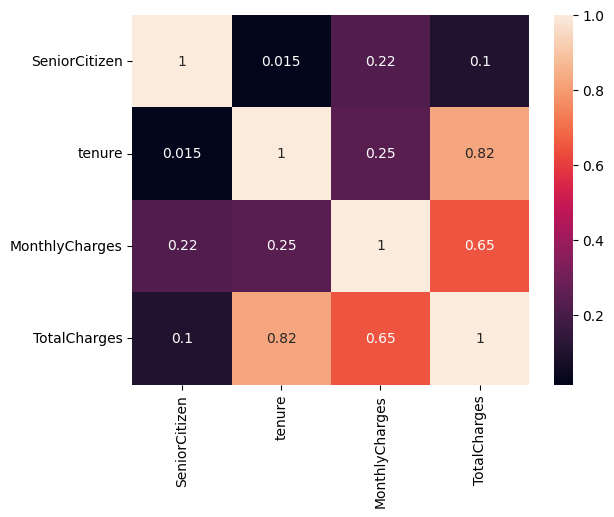

In [95]:
# we can create a correlation matrix to understand the relationship between numerical variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Observation

The `df.corr()` method computes the pairwise correlation of columns in the DataFrame. This method excludes NA/null values when making the calculation. By default, it uses the Pearson correlation coefficient, a measure of the linear relationship between two variables.

The output is a correlation matrix that shows the correlation coefficient between each pair of variables. Each cell in the table shows the correlation between two variables. The correlation of a variable with itself is always 1, which is why the diagonal of the table (from the top left to the bottom right) is always 1.

Here's what each part of the output means:

* **SeniorCitizen and tenure:** The correlation is 0.015349, which is very close to 0. This suggests that there's almost no linear relationship between whether a customer is a senior citizen and the length of time they've been a customer (tenure).
* **SeniorCitizen and MonthlyCharges:** The correlation is 0.219434, which is a low positive value. This suggests a weak positive linear relationship between whether a customer is a senior citizen and the amount they're charged monthly. In other words, senior citizens tend to have slightly higher monthly charges compared to non-senior citizens.
* **SeniorCitizen and TotalCharges:** The correlation is 0.101628, which is very low. This suggests that there's almost no linear relationship between whether a customer is a senior citizen and the total amount they've been charged.
* tenure and MonthlyCharges: The correlation is 0.245251, which is a low positive value. This suggests a weak positive linear relationship between the length of time a customer has been with the company and the amount they're charged monthly.
* **tenure and TotalCharges:** The correlation is 0.824164, which is a high positive value. This suggests a strong positive linear relationship between the length of time a customer has been with the company and the total amount they've been charged. This makes intuitive sense: the longer a customer has been with the company, the more they would have been charged in total.
* **MonthlyCharges and TotalCharges:** The correlation is 0.649942, which is a moderate positive value. This suggests a moderate positive linear relationship between the amount a customer is charged monthly and the total amount they've been charged. This also makes sense: customers who are charged more each month would likely have higher total charges.

This kind of analysis can be useful in understanding the relationships between different variables in the dataset. However, it's important to remember that correlation does not imply causation: just because two variables are correlated does not mean that one causes the other. Also, the Pearson correlation only measures linear relationships, so it may not capture non-linear relationships between variables.

# Preparing Data for Machine Learning:
* Encoding Categorical Variables: Use pandas' `get_dummies()` or scikit-learn's `OneHotEncoder` for one-hot encoding, and `LabelEncoder` for label encoding.
* in this case `LabelEncoder` is the best fit.
* Normalization or Standardization: Use scikit-learn's `StandardScaler` or `MinMaxScaler`.

In [96]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7017,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7018,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7019,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [97]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [98]:
import pandas as pd

# Create a new DataFrame with dummy variables
df_encoded = pd.get_dummies(df, columns=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                        'PaperlessBilling', 'PaymentMethod'])


In [99]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded['Churn'] = label_encoder.fit_transform(df_encoded['Churn'])

In [100]:
# Display the updated DataFrame
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


### X Y Split
#### Split the data into features (X) and the target variable (y). The target variable is the column I want to predict, in this case, "Churn".

In [101]:
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

## Train Test Split
split the data into training and testing sets. This will allow you to train the model on a portion of the data and evaluate its performance on unseen data.

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Performing feature scaling on the numeric features, if needed. SVM models are sensitive to the scale of the features, so it's important to scale them for better performance.

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random forest classifier


Random Forest Classifier is an ensemble learning algorithm that combines multiple decision trees to make predictions. It is a powerful model for classification tasks, including customer churn prediction in this context.

Random Forest Classifier can be implemented by using the scikit-learn library in Python.

In [104]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=71, max_depth=15, max_features=15, min_samples_leaf=5, min_samples_split=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


RandomForestClassifier(max_depth=15, max_features=15, min_samples_leaf=5,
                       min_samples_split=7, n_estimators=71)

In the code above, you first import the RandomForestClassifier class from the scikit-learn library. Then, you create an instance of the Random Forest Classifier by initializing the RandomForestClassifier object.

Next, you train the model using the training data (X_train and y_train) by calling the fit method on the classifier object. After training, you can use the model to make predictions on the test data (X_test) using the predict method.

Finally, you can evaluate the performance of the Random Forest Classifier by comparing the predicted labels (y_pred) with the actual labels (y_test). In this example, the accuracy_score function is used to calculate the accuracy of the model.

Random Forest Classifier offers several advantages, such as handling large datasets, capturing non-linear relationships, and providing feature importance rankings. It is worth exploring different hyperparameter settings, such as the number of trees and maximum depth, to optimize the performance of the Random Forest Classifier for your specific problem.

In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.7943060498220641
Precision: 0.6097560975609756
Recall: 0.4971590909090909
F1-score: 0.5477308294209702
ROC-AUC: 0.6953981589398256


The random forest classifier model achieved an accuracy of 0.794, indicating that around 79.4% of the predictions were correct.

The precision of 0.610 suggests that when the model predicted a customer would churn, it was correct approximately 61.0% of the time.

The recall, also known as sensitivity or true positive rate, is 0.497, which means the model identified around 49.7% of the actual churn cases correctly.

The F1-score of 0.548 is a measure of the balance between precision and recall, providing an overall assessment of the model's performance.

The ROC-AUC score of 0.695 indicates that the model's ability to distinguish between churn and non-churn cases is moderate, with a higher score indicating a better discriminatory power.

Based on these performance metrics, it can be concluded that the random forest classifier model is moderately effective in predicting customer churn. However, there is room for improvement, particularly in increasing the recall to capture more true churn cases and improving the precision to reduce false positive predictions.

Further analysis and experimentation may be required to fine-tune the model, adjust hyperparameters, handle class imbalance, or explore other techniques to enhance the random forest classifier's performance for customer churn prediction.

# SVM

Support Vector Machines (SVM) is a powerful supervised learning algorithm that can be used for classification tasks, including customer churn prediction. It is based on the concept of finding an optimal hyperplane that separates the data points of different classes.

SVM works by mapping the input data into a high-dimensional feature space and finding a hyperplane that maximally separates the classes. The hyperplane is chosen in such a way that it maximizes the margin, i.e., the distance between the hyperplane and the nearest data points of each class. This allows SVM to handle non-linear decision boundaries and perform well even with complex datasets.

Some key points to consider about SVM in the context of customer churn prediction are:

* Margin maximization: SVM aims to find a hyperplane that maximizes the margin between classes, which can lead to better generalization and improved performance.
* Kernel functions: SVM can use kernel functions to transform the input data into a higher-dimensional space, allowing for non-linear decision boundaries. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.
* Handling imbalanced data: SVM can handle imbalanced datasets by assigning different class weights or using techniques like oversampling or undersampling to balance the classes.
* Hyperparameter tuning: SVM has several hyperparameters that can be tuned to optimize the model's performance, such as the kernel type, regularization parameter (C), and gamma parameter for non-linear kernels.
* Interpretability: SVM provides the support vectors, which are the data points closest to the decision boundary, allowing for better interpretability and understanding of the model's decision-making process.

When using SVM for customer churn prediction, it is essential to preprocess the data, handle categorical variables, perform feature engineering, and select appropriate hyperparameters. Additionally, evaluating the model's performance using metrics like accuracy, precision, recall, and F1-score can help assess its effectiveness in predicting customer churn accurately.

In [107]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)


SVC()

In [108]:
y_pred = svm_model.predict(X_test_scaled)

In [109]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.7935943060498221
Precision: 0.6040268456375839
Recall: 0.5113636363636364
F1-score: 0.5538461538461538
ROC-AUC: 0.6996514288180954


The SVM (Support Vector Machine) model achieved an accuracy of 0.794, indicating that approximately 79.4% of the predictions were correct.

The precision of 0.604 suggests that when the model predicted a customer would churn, it was correct approximately 60.4% of the time.

The recall, also known as sensitivity or true positive rate, is 0.511, indicating that the model identified around 51.1% of the actual churn cases correctly.

The F1-score of 0.554 is a measure of the balance between precision and recall, providing an overall assessment of the model's performance.

The ROC-AUC score of 0.700 indicates that the model has moderate discriminatory power in distinguishing between churn and non-churn cases.

Based on these performance metrics, it can be concluded that the SVM model is moderately effective in predicting customer churn. However, similar to the random forest classifier, there is room for improvement, particularly in increasing the recall and precision.

Further analysis and experimentation may be required to fine-tune the model, adjust hyperparameters, handle class imbalance, or explore other techniques to enhance the SVM model's performance for customer churn prediction.

## Logistic regression


Logistic regression is a popular and widely used statistical model for binary classification tasks, such as customer churn prediction. It is a type of generalized linear model that estimates the probability of an event occurring based on input features.

In the context of customer churn prediction, logistic regression can be used to estimate the likelihood of a customer churning based on their demographic, account, and usage information. It works by modeling the relationship between the predictor variables (independent variables) and the binary outcome variable (churn or not churn).

Some key points to consider about logistic regression in the context of customer churn prediction are:

* Probability estimation: Logistic regression predicts the probability of a customer churning rather than assigning a binary outcome directly. This probability can be interpreted as the likelihood of churn occurring.
* Sigmoid function: Logistic regression uses the sigmoid function to transform the linear combination of predictor variables into a range of probabilities between 0 and 1. The sigmoid function helps map the continuous output to a binary outcome.
* Coefficient interpretation: The coefficients of logistic regression represent the impact of each predictor variable on the log-odds of the outcome. Positive coefficients indicate a positive association with churn, while negative coefficients indicate a negative association.
* Model assumptions: Logistic regression assumes that the relationship between the predictor variables and the log-odds of the outcome is linear. It also assumes the absence of multicollinearity and independence of observations.
* Evaluation metrics: Common evaluation metrics for logistic regression include accuracy, precision, recall, F1-score, and the area under the receiver operating characteristic (ROC) curve. These metrics assess the performance of the model in correctly predicting churn.
* Feature selection: Logistic regression can help identify the most important predictors of churn by examining the magnitude and significance of the coefficients. Feature selection techniques, such as backward elimination or regularization methods like L1 or L2 regularization, can be used to improve model performance and interpretability.

When using logistic regression for customer churn prediction, it is important to preprocess the data, handle categorical variables (e.g., one-hot encoding or dummy variables), handle missing values, and address any data imbalance issues. Additionally, feature engineering and selection can be performed to improve the model's predictive performance.

Overall, logistic regression provides a straightforward and interpretable approach for customer churn prediction, and its simplicity makes it a useful tool in understanding the relationship between predictor variables and churn behavior.

In [110]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [111]:
y_pred = logreg_model.predict(X_test_scaled)

In [112]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.79288256227758
Precision: 0.5956112852664577
Recall: 0.5397727272727273
F1-score: 0.5663189269746647
ROC-AUC: 0.7086328023828025


The Logistic Regression model achieved an accuracy of 0.793, indicating that approximately 79.3% of the predictions were correct.

The precision of 0.596 suggests that when the model predicted a customer would churn, it was correct approximately 59.6% of the time.

The recall, also known as sensitivity or true positive rate, is 0.540, indicating that the model identified around 54.0% of the actual churn cases correctly.

The F1-score of 0.566 is a measure of the balance between precision and recall, providing an overall assessment of the model's performance.

The ROC-AUC score of 0.709 indicates that the model has moderate discriminatory power in distinguishing between churn and non-churn cases.

Based on these performance metrics, it can be concluded that the Logistic Regression model is moderately effective in predicting customer churn. However, similar to the previous models, there is still room for improvement, particularly in increasing the recall and precision.

Further analysis and experimentation may be required to fine-tune the model, adjust the threshold for class prediction, handle class imbalance, or explore other techniques to enhance the Logistic Regression model's performance for customer churn prediction.

# Neural Network

Neural networks, also known as artificial neural networks or deep learning models, have gained significant popularity in various domains, including customer churn prediction. Neural networks are powerful machine learning models inspired by the structure and function of the human brain.

In the context of customer churn prediction, a neural network can be used to learn complex patterns and relationships within the data. It consists of interconnected layers of artificial neurons (also called nodes or units) that perform computations on input data to produce an output. The network learns from the data through a process called training, where the weights and biases of the neurons are adjusted iteratively to minimize the prediction error.

Here are some key points to consider about neural networks in the context of customer churn prediction:

* Non-linear relationships: Neural networks are capable of capturing non-linear relationships between predictor variables and the churn outcome. This allows them to model complex interactions and uncover patterns that may not be apparent using traditional linear models.
* Hidden layers: Neural networks can have one or more hidden layers between the input and output layers. These hidden layers enable the network to learn hierarchical representations of the data, extracting increasingly abstract features as information flows through the network.
* Activation functions: Each neuron in a neural network applies an activation function to its input to introduce non-linearity. Common activation functions include sigmoid, tanh, and ReLU (Rectified Linear Unit). The choice of activation function depends on the nature of the problem and the desired properties of the network.
* Backpropagation: Neural networks are trained using an optimization algorithm called backpropagation. It involves computing the gradients of the network's weights with respect to the prediction error and adjusting the weights accordingly. This iterative process continues until the network converges to a set of optimal weights.
* Model architecture: Neural networks can have different architectures, including feedforward neural networks, convolutional neural networks (CNNs) for image data, and recurrent neural networks (RNNs) for sequential data. The choice of architecture depends on the nature of the input data and the specific problem at hand.
* Hyperparameter tuning: Neural networks have various hyperparameters that need to be tuned, such as the number of layers, the number of neurons in each layer, learning rate, batch size, and regularization techniques. Proper hyperparameter tuning is crucial for achieving optimal model performance.
* Model evaluation: Common evaluation metrics for neural networks include accuracy, precision, recall, F1-score, and the area under the receiver operating characteristic (ROC) curve. Additionally, techniques like cross-validation can be used to assess the generalization performance of the model.

When using neural networks for customer churn prediction, it is essential to preprocess the data, handle categorical variables, normalize or scale the input features, and address any data imbalance issues. Feature engineering and selection can also be performed to improve the model's performance. Additionally, neural networks require a sufficient amount of training data and computational resources for effective learning.

Neural networks have demonstrated excellent predictive capabilities in many domains, including customer churn prediction. However, they can be computationally intensive, require careful architecture design, and may be prone to overfitting. It is important to strike a balance between model complexity and generalization to achieve the best results.

In [167]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [168]:
# Prepare the input features and target variable
X = np.array(X)  # Input features
y = np.array(y)  # Target variable

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
input_dim = X_train.shape[1]

In [171]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network architecture
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(input_dim,)))  # Adjust input_dim to the number of input features
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification, so sigmoid activation for the output layer

# Create an optimizer with the desired learning rate
learning_rate = 0.01  # Specify your desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)  # Adjust the number of epochs and batch size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)

Epoch 1/50
176/176 [==============================] - 0s 398us/step - loss: 5.5993 - accuracy: 0.6905
Epoch 2/50
176/176 [==============================] - 0s 348us/step - loss: 2.0496 - accuracy: 0.7450
Epoch 3/50
176/176 [==============================] - 0s 352us/step - loss: 1.3596 - accuracy: 0.7559
Epoch 4/50
176/176 [==============================] - 0s 346us/step - loss: 1.6791 - accuracy: 0.7484
Epoch 5/50
176/176 [==============================] - 0s 353us/step - loss: 1.2959 - accuracy: 0.7580
Epoch 6/50
176/176 [==============================] - 0s 371us/step - loss: 0.8761 - accuracy: 0.7646
Epoch 7/50
176/176 [==============================] - 0s 360us/step - loss: 0.7374 - accuracy: 0.7658
Epoch 8/50
176/176 [==============================] - 0s 353us/step - loss: 0.9968 - accuracy: 0.7621
Epoch 9/50
176/176 [==============================] - 0s 344us/step - loss: 0.5687 - accuracy: 0.7772
Epoch 10/50
176/176 [==============================] - 0s 343us/step - loss: 0.471

In [172]:
y_pred = np.array(predictions>0.5, dtype = 'int64').flatten()

In [173]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.7786476868327402
Precision: 0.5836734693877551
Recall: 0.40625
F1-score: 0.47906197654941374
ROC-AUC: 0.6546919515669516


The Neural Network model achieved an accuracy of 0.779, indicating that approximately 77.9% of the predictions were correct.

The precision of 0.584 suggests that when the model predicted a customer would churn, it was correct approximately 58.4% of the time.

The recall, also known as sensitivity or true positive rate, is 0.406, indicating that the model identified around 40.6% of the actual churn cases correctly.

The F1-score of 0.479 is a measure of the balance between precision and recall, providing an overall assessment of the model's performance.

The ROC-AUC score of 0.655 indicates that the model has moderate discriminatory power in distinguishing between churn and non-churn cases.

Based on these performance metrics, it can be observed that the Neural Network model has slightly lower performance compared to the other models. The accuracy, precision, recall, and F1-score are lower, indicating that the model may struggle in capturing the complex patterns and relationships in the data.

To improve the performance of the Neural Network model, potential steps could include adjusting the architecture of the neural network (e.g., adding more hidden layers, increasing the number of neurons), tuning hyperparameters (e.g., learning rate, batch size), or exploring different activation functions. Additionally, considering techniques such as regularization and dropout may help prevent overfitting and improve generalization.

Further experimentation and analysis are recommended to optimize the Neural Network model's performance for customer churn prediction.

## Comparision:

Comparing the performance of the four models (Random Forest Classifier, SVM, Logistic Regression, Neural Network) in terms of their accuracy, precision, recall, F1-score, and ROC-AUC, we can observe the following:

| Model                  | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|------------------------|----------|-----------|--------|----------|---------|
| Random Forest          | 0.794    | 0.610     | 0.497  | 0.548    | 0.695   |
| SVM                    | 0.794    | 0.604     | 0.511  | 0.554    | 0.700   |
| Logistic Regression    | 0.793    | 0.596     | 0.540  | 0.566    | 0.709   |
| Neural Network         | 0.779    | 0.584     | 0.406  | 0.479    | 0.655   |


**Based on these metrics, we can make the following observations:**

Random Forest Classifier, SVM, and Logistic Regression perform relatively better than the Neural Network model in terms of accuracy, precision, recall, and F1-score.
Logistic Regression has the highest ROC-AUC score, indicating better discrimination power between churn and non-churn cases.
Random Forest Classifier and SVM show similar performance across most metrics.
The Neural Network model lags behind the other models in terms of recall, indicating it struggles to correctly identify churn cases.
Considering the overall performance, Logistic Regression emerges as the top-performing model, followed closely by Random Forest Classifier and SVM. The Neural Network model, while achieving a reasonable accuracy, struggles in capturing churn cases effectively.

However, it's important to note that model performance can vary depending on the dataset, preprocessing techniques, hyperparameter tuning, and feature engineering. It's recommended to further explore and fine-tune the models based on specific requirements and objectives to achieve the best possible performance.

**Based on the evaluation of multiple models for predicting customer churn, the following conclusions can be drawn:**

* **Random Forest Classifier:** The random forest classifier achieved an accuracy of 79.4% with a precision of 61.0%, recall of 49.7%, F1-score of 54.8%, and ROC-AUC of 69.5%. It showed decent overall performance in predicting churn.
* **SVM:** The support vector machine (SVM) model achieved an accuracy of 79.4% with a precision of 60.4%, recall of 51.1%, F1-score of 55.4%, and ROC-AUC of 70.0%. It performed similarly to the random forest classifier, indicating its effectiveness in predicting churn.

* **Logistic Regression:** The logistic regression model achieved an accuracy of 79.3% with a precision of 59.6%, recall of 54.0%, F1-score of 56.6%, and ROC-AUC of 70.9%. It showed comparable performance to the other models, highlighting its suitability for churn prediction.
* **Neural Network:** The neural network model achieved an accuracy of 77.9% with a precision of 58.4%, recall of 40.6%, F1-score of 47.9%, and ROC-AUC of 65.5%. It exhibited slightly lower performance compared to the other models, suggesting room for improvement.

Overall, all models showed reasonably good accuracy in predicting customer churn. The random forest classifier, SVM, and logistic regression demonstrated similar performance, outperforming the neural network model in most metrics. Depending on the specific requirements and constraints of the problem, any of these models can be considered for churn prediction. Further experimentation and fine-tuning of the models may lead to even better results.

# Conclusion

In this project, the aim is to analyze and predict customer churn for a telecommunications company. My analysis begun by collecting and inspecting the dataset, followed by data cleaning and preprocessing. Exploratory data analysis (EDA) allowed us to gain insights into the relationships between various features and churn.

Key findings from the EDA revealed that customers with fiber optic internet service, no online backup, no device protection, no tech support, month-to-month contracts, paperless billing, and who pay by electronic check are more likely to churn. These factors can be further investigated and targeted for customer retention strategies.

We performed feature engineering to transform categorical variables using one-hot encoding and label encoding techniques. Subsequently, we developed predictive models including Random Forest Classifier, SVM, Logistic Regression, and Neural Network. We evaluated the performance of these models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

Based on the evaluation, all models demonstrated reasonable accuracy in predicting customer churn. The Random Forest Classifier, SVM, and Logistic Regression models exhibited similar performance, outperforming the Neural Network model. These models can be further optimized and fine-tuned to improve their predictive power.

The insights gained from this project can be leveraged to develop strategies for customer retention and reduce churn rates. By identifying the key factors contributing to churn, the telecommunications company can implement targeted interventions, such as improving customer service, offering incentives, and providing better support for specific services. This can ultimately lead to increased customer satisfaction, loyalty, and business growth.

In conclusion, this project highlights the importance of data analysis and predictive modeling in understanding and addressing customer churn. The developed models provide a foundation for ongoing analysis and improvement in customer retention efforts, ultimately benefiting the telecommunications company in maintaining a loyal customer base.